In [3]:
import numpy as np
import pandas as pd 
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [4]:
diabetes_read = pd.read_csv(r'C:\Users\Sony\anaconda3\diabetes.csv')
print(diabetes_read.shape) #row & column

(768, 9)


In [5]:
diabetes_read.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
diabetes_read.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetes_read.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#checking null values
diabetes_read.iloc[:,:].isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

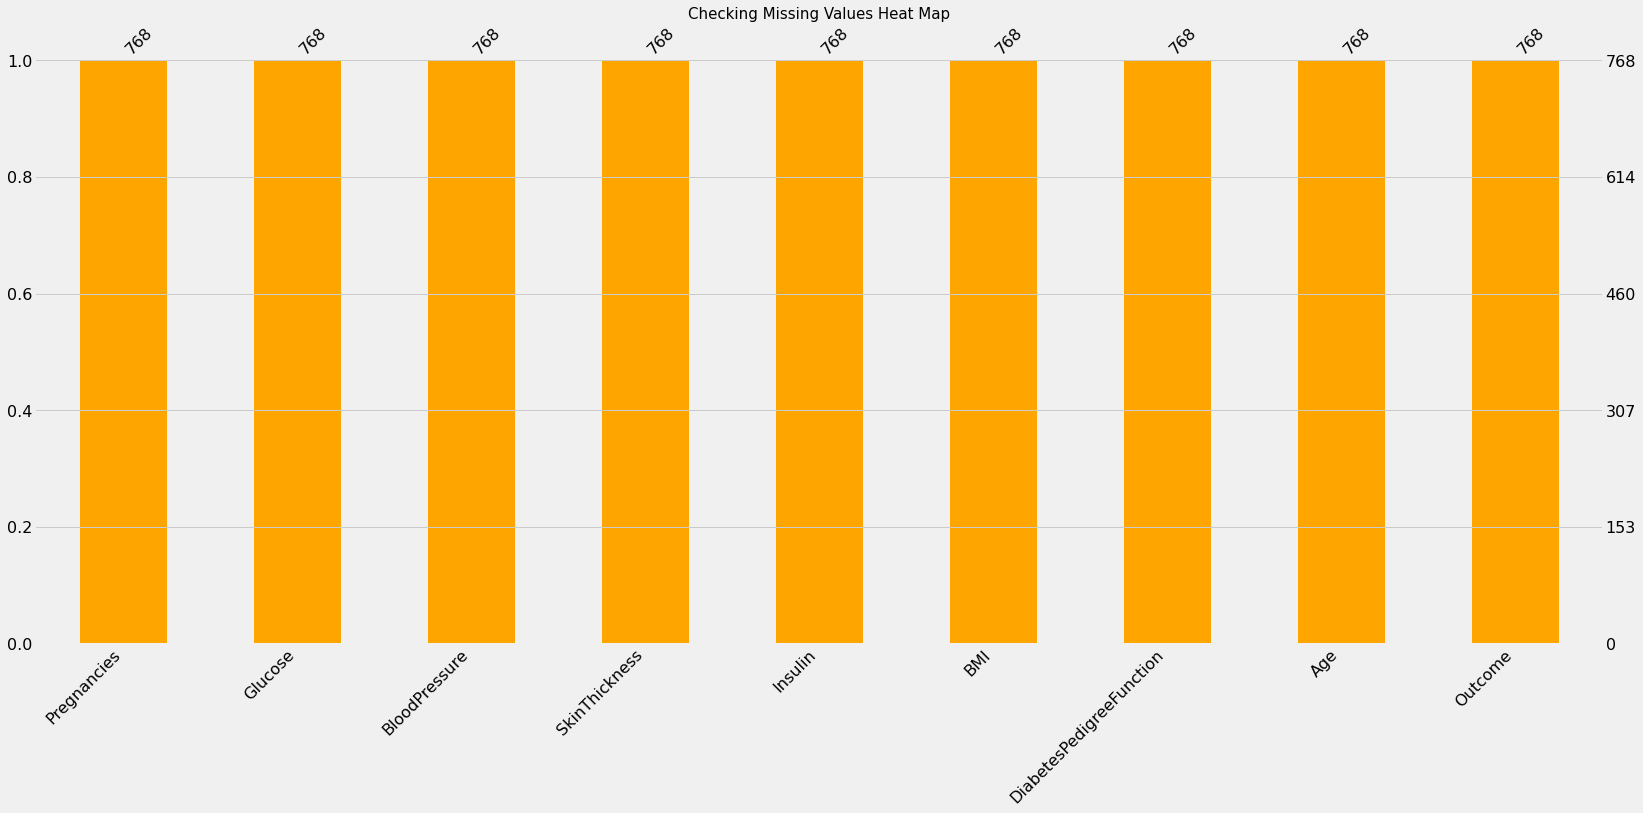

In [9]:
#checking null values with heatmap

mno.bar(diabetes_read.iloc[:,:],
        color = 'orange',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map', fontsize = 15)
plt.show()

#shows there are no null values

In [10]:
#calculate the mean of blood pressure

blood_pressure= diabetes_read['BloodPressure'].mean()


In [11]:
blood_pressure

69.10546875

In [12]:
mean_bloodPressure= np.mean(blood_pressure)
print("Mean of Blood pressure is - >",mean_bloodPressure)

Mean of Blood pressure is - > 69.10546875


In [13]:
#replacing 0 with average of bloodpressure i.e 69 

diabetes_read['BloodPressure'] = diabetes_read['BloodPressure'].replace({0:69})
blood_pressure= diabetes_read['BloodPressure']
blood_pressure.head(20)


0     72
1     66
2     64
3     66
4     40
5     74
6     50
7     69
8     70
9     96
10    92
11    74
12    80
13    60
14    72
15    69
16    84
17    74
18    30
19    70
Name: BloodPressure, dtype: int64

In [14]:
im=round(diabetes_read['Insulin'].mean())
print(im)
insulin = diabetes_read['Insulin'].replace({0:im}) #(diabetes_read['Insulin'].mean(), inplace = True)
insulin.head(30)

80


0      80
1      80
2      80
3      94
4     168
5      80
6      88
7      80
8     543
9      80
10     80
11     80
12     80
13    846
14    175
15     80
16    230
17     80
18     83
19     96
20    235
21     80
22     80
23     80
24    146
25    115
26     80
27    140
28    110
29     80
Name: Insulin, dtype: int64

In [15]:
# considering Diabetic person on basis of OUTPUT Column contains value 1
# retrieving all rows which contains output 1 fir diabetic people
diabetic_data=diabetes_read.loc[diabetes_read['Outcome'] == 1]
diabetic_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,69,0,0,30.0,0.484,32,1


In [16]:
#calculating diabetic data average BP, SkinThickness and Age
dm=np.mean(diabetic_data['BloodPressure'])
print("average of BP for diabetic people - ", round(dm))
dm2=np.mean(diabetic_data['SkinThickness'])
print("average of SkinThickness for diabetic people - ", round(dm2))
dm3=np.mean(diabetic_data['Age'])
print("average of Age for diabetic people - ", round(dm3))
round((diabetic_data[['BloodPressure', 'SkinThickness', 'Age']].mean()))

average of BP for diabetic people -  75
average of SkinThickness for diabetic people -  22
average of Age for diabetic people -  37


BloodPressure    75.0
SkinThickness    22.0
Age              37.0
dtype: float64

In [17]:
# considering Non-Diabetic person on basis of OUTPUT Column contains value 0
# retrieving all rows which contains output 0 f0r diabetic people
Non_diabetic_data=diabetes_read.loc[diabetes_read['Outcome'] == 0]
Non_diabetic_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,69,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
21,8,99,84,0,0,35.4,0.388,50,0
27,1,97,66,15,140,23.2,0.487,22,0


In [18]:
#calculating Non-diabetic data average BP, SkinThickness and Age
dp1=np.mean(Non_diabetic_data['BloodPressure'])
print("average of BP for Non-diabetic people - ", round(dp1))
dp2=np.mean(Non_diabetic_data['SkinThickness'])
print("average of SkinThickness for Non-diabetic people - ", round(dp2))
dp3=np.mean(Non_diabetic_data['Age'])
print("average of Age for Non-diabetic people - ", round(dp3))

average of BP for Non-diabetic people -  71
average of SkinThickness for Non-diabetic people -  20
average of Age for Non-diabetic people -  31


In [19]:
# which factor is most correlated to target and which is least

In [35]:
df=pd.ExcelFile(r"C:\Users\Sony\Downloads\2738_RES_Business_Analytics_with_Excel_Datasets\Business_Analytics_with_Excel_Dataset\Master Sales Data.xlsx")
df1=pd.read_excel(df,'Master Data')
df1.head()
#df1.describe()

,Dates,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Product,Product ID,Salesman,Designation,Region,No. Customers,Net Sales,Profit / Loss
0,2012-01-01,1111,2012-01-16,Same Day,JA-HA-01,James Hansen,Consumer,Product1,P00001,Adam,Associate,North,8,7164.0,844.158
1,2012-01-02,1112,2012-01-17,Second Class,DA-RI-01,David Ritter,Corporate,Product2,P00002,Adam,Associate,North,8,6528.0,3376.632
2,2012-01-03,1113,2012-01-18,First Class,TO-RE-01,Tom Alter Reiter,Consumer,Product3,P00003,Adam,Associate,West,8,2520.0,2280.000
3,2012-01-05,1115,2012-01-20,First Class,JA-MU-01,James Murray,Home Office,Product2,P00002,Adam,Associate,West,10,9660.0,1737.351
4,2012-01-06,1116,2012-01-21,Same Day,AR-HA-01,Armando Hansen,Consumer,Product3,P00003,Adam,Associate,Middle,10,11550.0,854.700


In [37]:
df1.iloc[:,:].isnull().sum()

Dates            0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Product          0
Product ID       0
Salesman         0
Designation      0
Region           0
No. Customers    0
Net Sales        0
Profit / Loss    0
dtype: int64

In [38]:
df1.shape

(1325, 15)

In [32]:
df1.describe()

,Order ID,No. Customers,Net Sales,Profit / Loss
count,1325.000000,1325.000000,1325.000000,1325.000000
mean,1968.069434,8.018113,6565.561887,2417.216046
std,548.882418,1.418364,3455.747446,1307.788323
min,1111.000000,6.000000,1377.000000,461.601000
25%,1443.000000,7.000000,3822.000000,1311.974400
50%,1945.000000,8.000000,6192.000000,2280.000000
75%,2471.000000,9.000000,8955.000000,3352.425300
max,2915.000000,10.000000,14985.000000,6256.278000


In [39]:
df1.dtypes

Dates            datetime64[ns]
Order ID                  int64
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Product                  object
Product ID               object
Salesman                 object
Designation              object
Region                   object
No. Customers             int64
Net Sales               float64
Profit / Loss           float64
dtype: object

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Dates          1325 non-null   datetime64[ns]
 1   Order ID       1325 non-null   int64         
 2   Ship Date      1325 non-null   datetime64[ns]
 3   Ship Mode      1325 non-null   object        
 4   Customer ID    1325 non-null   object        
 5   Customer Name  1325 non-null   object        
 6   Segment        1325 non-null   object        
 7   Product        1325 non-null   object        
 8   Product ID     1325 non-null   object        
 9   Salesman       1325 non-null   object        
 10  Designation    1325 non-null   object        
 11  Region         1325 non-null   object        
 12  No. Customers  1325 non-null   int64         
 13  Net Sales      1325 non-null   float64       
 14  Profit / Loss  1325 non-null   float64       
dtypes: datetime64[ns](2),

In [53]:
df1['NewColumn']= df1['Order ID']+50

In [54]:
df1['NewColumn']=df1['NewColumn'].astype('float')


In [55]:
df1.head()

,Dates,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Product,Product ID,Salesman,Designation,Region,No. Customers,Net Sales,Profit / Loss,NewColumn
0,2012-01-01,1111,2012-01-16,Same Day,JA-HA-01,James Hansen,Consumer,Product1,P00001,Adam,Associate,North,8,7164.0,844.158,1161.0
1,2012-01-02,1112,2012-01-17,Second Class,DA-RI-01,David Ritter,Corporate,Product2,P00002,Adam,Associate,North,8,6528.0,3376.632,1162.0
2,2012-01-03,1113,2012-01-18,First Class,TO-RE-01,Tom Alter Reiter,Consumer,Product3,P00003,Adam,Associate,West,8,2520.0,2280.000,1163.0
3,2012-01-05,1115,2012-01-20,First Class,JA-MU-01,James Murray,Home Office,Product2,P00002,Adam,Associate,West,10,9660.0,1737.351,1165.0
4,2012-01-06,1116,2012-01-21,Same Day,AR-HA-01,Armando Hansen,Consumer,Product3,P00003,Adam,Associate,Middle,10,11550.0,854.700,1166.0
